#🚜 **Predicting the Sale Price of Bulldozers using Machine Learning**

---


In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Original Competition link:- https://www.kaggle.com/c/bluebook-for-bulldozers/overview

## **1. Problem Defination**
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?


## **2. Data**
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* **Train.csv** is the training set, which contains data through the end of 2011.

* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


##**3. Evaluation**

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check :-

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.


##**4. Features**

Kaggle provides a data dictionary detailing all of the features of the dataset.

You can view this data dictionary on Google Sheets :- 

https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

##**Preparing the Tools**
We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
# Importing all the tools we need.

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Our model from Scikit-learn
from sklearn.ensemble import RandomForestRegressor

# For Model Evaluation
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Importing Training and Validation sets
df=pd.read_csv("/content/drive/MyDrive/TrainAndValid.csv",low_memory=False)
df.head().T

0  ...                                                  4
SalesID                                                    1139246  ...                                            1139253
SalePrice                                                    66000  ...                                              11000
MachineID                                                   999089  ...                                            1057373
ModelID                                                       3157  ...                                              17311
datasource                                                     121  ...                                                121
auctioneerID                                                     3  ...                                                  3
YearMade                                                      2004  ...                                               2007
MachineHoursCurrentMeter                                        68  ...                                                722
UsageBand                                                      Low  ...                                             Medium
saledate                                           11/16/2006 0:00  ...                                     7/23/2009 0:00
fiModelDesc                                                   521D  ...                                               S175
fiBaseModel                                                    521  ...                                               S175
fiSecondaryDesc                                                  D  ...                                                NaN
fiModelSeries                                                  NaN  ...                                                NaN
fiModelDescriptor                                              NaN  ...                                                NaN
ProductSize                                                    NaN  ...                                                NaN
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower  ...  Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
state                                                      Alabama  ...                                           New York
ProductGroup                                                    WL  ...                                                SSL
ProductGroupDesc                                      Wheel Loader  ...                                 Skid Steer Loaders
Drive_System                                                   NaN  ...                                                NaN
Enclosure                                               EROPS w AC  ...                                              EROPS
Forks                                          None or Unspecified  ...                                None or Unspecified
Pad_Type                                                       NaN  ...                                                NaN
Ride_Control                                   None or Unspecified  ...                                                NaN
Stick                                                          NaN  ...                                                NaN
Transmission                                                   NaN  ...                                                NaN
Turbocharged                                                   NaN  ...                                                NaN
Blade_Extension                                                NaN  ...                                                NaN
Blade_Width                                                    NaN  ...                                                NaN
Enclosure_Type                                                 NaN  ...                                                NaN
Engine_Horsepower                                              NaN  ...                                                NaN
Hydrau

In [ ]:
# Dataset contains total 412698 Rows and 53 Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
# Checking for Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

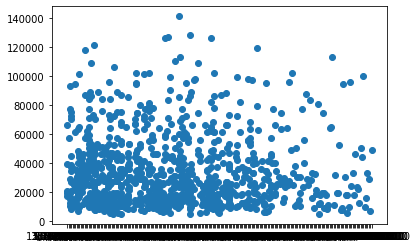

In [ ]:
# Let's try to visualize some data and take only first 1000 Rows
fig,ax= plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

# In our plot the saledate column on X-axis,it's in 'object' dtype which makes it look funky.

In [ ]:
# This is our X-axis in above plot:-
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

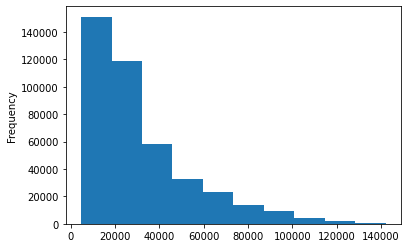

In [ ]:
df.SalePrice.plot.hist()

## **Parsing Dates**
When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [ ]:
# Import data again but this time Parse Dates
df=pd.read_csv("/content/drive/MyDrive/TrainAndValid.csv",low_memory=False,
               parse_dates=["saledate"])
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

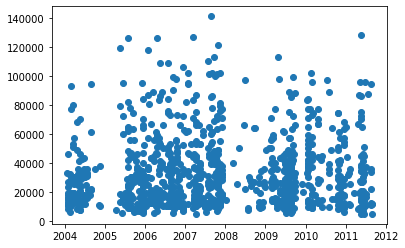

In [ ]:
# Making the same plot as above after parsing Dates
fig,ax= plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [ ]:
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

##**Sort the DataFrame by Sale date**
When working with time series data, it's a good idea to sort it by date.

In [ ]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True) 
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

###  **Make a copy of the Original DataFrame** 
We make a copy of the original dataframe so when we manipulate the copy, we've still got out original data

In [ ]:
# Make a copy
df_tmp= df.copy()

## **Adding datetime parameters for saledate column**

In [ ]:
df_tmp["saleYear"]= df_tmp.saledate.dt.year
df_tmp["saleMonth"]= df_tmp.saledate.dt.month
df_tmp["saleDay"]= df_tmp.saledate.dt.day

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [ ]:
# Now we've Enriched our DataFrame with date time features, we can now drop "saledata"
df_tmp.drop("saledate",axis=1,inplace=True)

In [ ]:
# Check the value of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

##**Convert String into Categories**
One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [ ]:
# To check if column value is String
pd.api.types.is_string_dtype(df_tmp["UsageBand"])    

True

In [ ]:
# Find all the columns which contain Strings
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# If you're wondering what df.items() does, here's an example
random_dict ={"key1":"Hello",
              "key2":"World!"}
for key,value in random_dict.items():
  print(f"This is a key: {key}",
        f"This is a value: {value}")

This is a key: key1 This is a value: Hello
This is a key: key2 This is a value: World!


In [ ]:
# This will turn all of the string values into category values
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label]= content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
df_tmp.state.cat.categories
#All are sorted now.

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now we have a way to access all our data in the form of numbers.

But we still have a bunch of missing data...

In [ ]:
# Check missing Data
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## **Filling Missing Values**
###**Filling numerical missing values first**

In [ ]:
# Printing all numerical columns
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label) 

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay


In [ ]:
# Check for which numeric columns have null values
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill numeric rows with the median
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Fill missing numeric values with median
      df_tmp[label]= content.fillna(content.median())

In [ ]:
# Checking again for which numeric columns have null values
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## **Filling and turning categorical variables into numbers**

In [ ]:
# Check for columns which aren't numeric
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
# Turn Categorical variables into numbers and fill missing values
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    #Turn categories into numbers and add +1
    df_tmp[label]= pd.Categorical(content).codes+1 

In [ ]:
df_tmp.head()

SalesID  SalePrice  MachineID  ...  saleYear  saleMonth  saleDay
205615  1646770     9500.0    1126363  ...      1989          1       17
274835  1821514    14000.0    1194089  ...      1989          1       31
141296  1505138    50000.0    1473654  ...      1989          1       31
212552  1671174    16000.0    1327630  ...      1989          1       31
62755   1329056    22000.0    1336053  ...      1989          1       31

[5 rows x 55 columns]

In [ ]:
# Checking if any null values remains
df_tmp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

##**Modelling**

We've done enough EDA(we can always do more) but let's start to do some modelling.

## **Splitting data into training & validation sets**

In [ ]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [ ]:
# Split Data into Training and Validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train= df_tmp[df_tmp.saleYear!= 2012]
len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X and y
X_train,y_train = df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape ,y_train.shape, X_valid.shape ,y_valid.shape

((401125, 54), (401125,), (11573, 54), (11573,))

## **Building an evaluation function**

Our project needs RMSLE(Root Mean Squared Log Error) for Evaluation which is not in-built in Scikit-learn, therefore we will build it.

In [ ]:
# Create Evaluation function (Our competition require RMSLE)
def rmsle(y_test,y_preds):
  """
  Calculates Root Mean Squared Log Error between predictions and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds=model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
            "Valid MAE": mean_absolute_error(y_valid,val_preds),
            "Training RMSLE": rmsle(y_train,train_preds),
            "Valid RMSLE": rmsle(y_valid,val_preds),
            "Training R^2 ": r2_score(y_train,train_preds),
            "Valid R^2 ": r2_score(y_valid,val_preds)}
  return scores 

##**Testing Our Model(for hyperparameters tuning)**

In [ ]:
%%time
model=RandomForestRegressor(n_jobs=-1,random_state=2)
model.fit(X_train,y_train)

CPU times: user 13min 58s, sys: 1.87 s, total: 13min 59s
Wall time: 7min 8s


In [ ]:
show_scores(model)

{'Training MAE': 1580.8247330632594,
 'Training RMSLE': 0.08427808649707451,
 'Training R^2 ': 0.9875177665831142,
 'Valid MAE': 6078.002800483885,
 'Valid RMSLE': 0.2521964203188381,
 'Valid R^2 ': 0.8739196879652789}

## **Hyperparameter tuning with RandomisedSearchCV**

Our model have got a preety good score already, let's see if we can improve it with RandomisedSearchCV

In [ ]:
# Getting the best parameters for our RandomForestRegressor
%%time
# Different RandomForestRegressor hyperparameters tuning
rf_grid= {"n_estimators":np.arange(10,100,10),
          "max_depth": [None,3,5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","auto"]}

# Instantiatee RandomisedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=2),
                              param_distributions=rf_grid,
                              n_iter =5,
                              cv=5,
                              verbose =True)
# Fit the RandomSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 5min 35s, sys: 3.02 s, total: 5min 38s
Wall time: 17min 50s


In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 17,
 'min_samples_split': 8,
 'n_estimators': 90}

In [ ]:
# Evaluate the RandomisedSearch Model
show_scores(rs_model)

{'Training MAE': 4344.887824317591,
 'Training RMSLE': 0.20498869438677836,
 'Training R^2 ': 0.9115017804035017,
 'Valid MAE': 6107.588342502657,
 'Valid RMSLE': 0.24811808373919858,
 'Valid R^2 ': 0.8720087198567501}

##**Making predictions on test data**

In [ ]:
# Import the test data
df_test= pd.read_csv("/content/drive/MyDrive/Test.csv",parse_dates=["saledate"])
df_test.head().T

0  ...                                                  4
SalesID                                                             1227829  ...                                            1227863
MachineID                                                           1006309  ...                                            1053887
ModelID                                                                3168  ...                                              22312
datasource                                                              121  ...                                                121
auctioneerID                                                              3  ...                                                  3
YearMade                                                               1999  ...                                               2005
MachineHoursCurrentMeter                                               3688  ...                                               2286
UsageBand                                                               Low  ...                                                Low
saledate                                                2012-05-03 00:00:00  ...                                2012-05-10 00:00:00
fiModelDesc                                                            580G  ...                                               650K
fiBaseModel                                                             580  ...                                                650
fiSecondaryDesc                                                           G  ...                                                  K
fiModelSeries                                                           NaN  ...                                                NaN
fiModelDescriptor                                                       NaN  ...                                                NaN
ProductSize                                                             NaN  ...                                                NaN
fiProductClassDesc        Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...  ...  Track Type Tractor, Dozer - 20.0 to 75.0 Horse...
state                                                               Wyoming  ...                                            Florida
ProductGroup                                                             BL  ...                                                TTT
ProductGroupDesc                                            Backhoe Loaders  ...                                Track Type Tractors
Drive_System                                                Two Wheel Drive  ...                                                NaN
Enclosure                                                             OROPS  ...                                              OROPS
Forks                                                                   Yes  ...                                                NaN
Pad_Type                                                None or Unspecified  ...                                                NaN
Ride_Control                                                             No  ...                                                NaN
Stick                                                              Standard  ...                                                NaN
Transmission                                                       Standard  ...                                        Hydrostatic
Turbocharged                                            None or Unspecified  ...                                                NaN
Blade_Extension                                                         NaN  ...                                                NaN
Blade_Width                                                             NaN  ...                                                NaN
Enclosure_Type                                                          NaN  ...                                  

##**Preprocessing Test Data**

As we can see, In the above table out Test data have many null values, so before using it we have to change it by Filling missing values and converting each String into an integer form.

In [ ]:
# Adding Year,Month and Day Column in test set
df_test["saleYear"]= df_test.saledate.dt.year
df_test["saleMonth"]= df_test.saledate.dt.month
df_test["saleDay"]= df_test.saledate.dt.day

# Now we've Enriched our DataFrame with date time features, we can now drop "saledata"
df_test.drop("saledate",axis=1,inplace=True)

# This will turn all of the string values into category values
for label,content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    df_test[label]= content.astype("category").cat.as_ordered()

# Fill numeric rows with the median
for label,content in df_test.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Fill missing numeric values with median
      df_test[label]= content.fillna(content.median())

# Turn Categorical variables into numbers and fill missing values
for label,content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    #Turn categories into numbers and add +1
    df_test[label]= pd.Categorical(content).codes+1 

In [ ]:
# Check if any missing Data is left
df_test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [ ]:
test_preds= model.predict(df_test)

In [ ]:
test_preds

array([21890. , 18335.5, 47055. , ..., 12099. , 19295. , 29682.5])

We've made some predictions but they're not in the same format Kaggle is asking for:

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [ ]:
# Format predictions into the same format for Kaggle Submission
df_preds= pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds

SalesID  SalesPrice
0      1227829     21890.0
1      1227844     18335.5
2      1227847     47055.0
3      1227848     88115.0
4      1227863     54874.0
...        ...         ...
12452  6643171     51825.0
12453  6643173     10460.0
12454  6643184     12099.0
12455  6643186     19295.0
12456  6643196     29682.5

[12457 rows x 2 columns]

In [ ]:
# Export prediction data
df_preds.to_csv("Test_predictions.csv",index=False)

##**Feature Importance**

Feature Importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **Target variable**(SalePrice)

In [ ]:
# Find feature importances of our model
model.feature_importances_

array([5.16566786e-02, 1.80015798e-02, 3.23717251e-02, 5.06704898e-04,
       5.20737969e-03, 2.61880467e-01, 3.55359826e-03, 1.33345874e-03,
       2.02636953e-02, 8.15241182e-02, 5.22093596e-02, 5.00021420e-03,
       4.28400362e-03, 2.30174793e-01, 3.97451697e-02, 1.02842156e-02,
       2.51645704e-04, 2.32331213e-04, 1.72415353e-03, 9.25694955e-03,
       5.12900876e-04, 4.33721867e-05, 6.39436864e-04, 1.84034366e-04,
       1.54053669e-03, 3.26712961e-05, 3.41043683e-04, 5.15913952e-03,
       4.81994816e-04, 3.75984407e-04, 6.41834068e-03, 3.00228096e-03,
       2.44006878e-03, 6.38519801e-03, 7.04771169e-04, 2.18571820e-03,
       1.18981836e-03, 3.00934940e-02, 1.49065800e-05, 6.31658308e-06,
       2.20912574e-04, 1.23674268e-03, 1.43261181e-03, 8.46672467e-04,
       2.78565680e-04, 5.61548179e-04, 3.59297348e-04, 1.97723090e-03,
       1.18254951e-03, 2.21054223e-04, 2.69040957e-04, 7.68457900e-02,
       1.24426225e-02, 1.09110917e-02])

In [ ]:
# Helper function for plotting feature importances
def plot_features(columns,importances,n=20):
  df=(pd.DataFrame({"features":columns,
                    "feature_importances":importances})
      .sort_values("feature_importances",ascending=False)
      .reset_index(drop=True))
  # plot the DataFrame
  fig,ax =plt.subplots()
  ax.barh(df["features"][:n],df["feature_importances"][:n])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature Importance")
  ax.invert_yaxis()

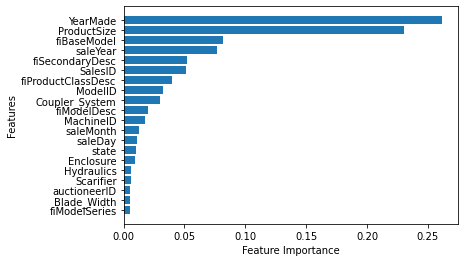

In [ ]:
plot_features(X_train.columns,model.feature_importances_)

##**Final Challenges/Extensions:** 

1. For Improving th preformance we can also use GridSearchCV but it will take a large amount of Processing power and Time.

2. What other machine learning models could we try on our dataset? Hint:

  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

  Check out the regression section of this map, or try to look at something like CatBoost.ai or XGBooost.ai.